## Visualizing LLC Miss Latency Distribution

<IPython.core.display.Javascript object>


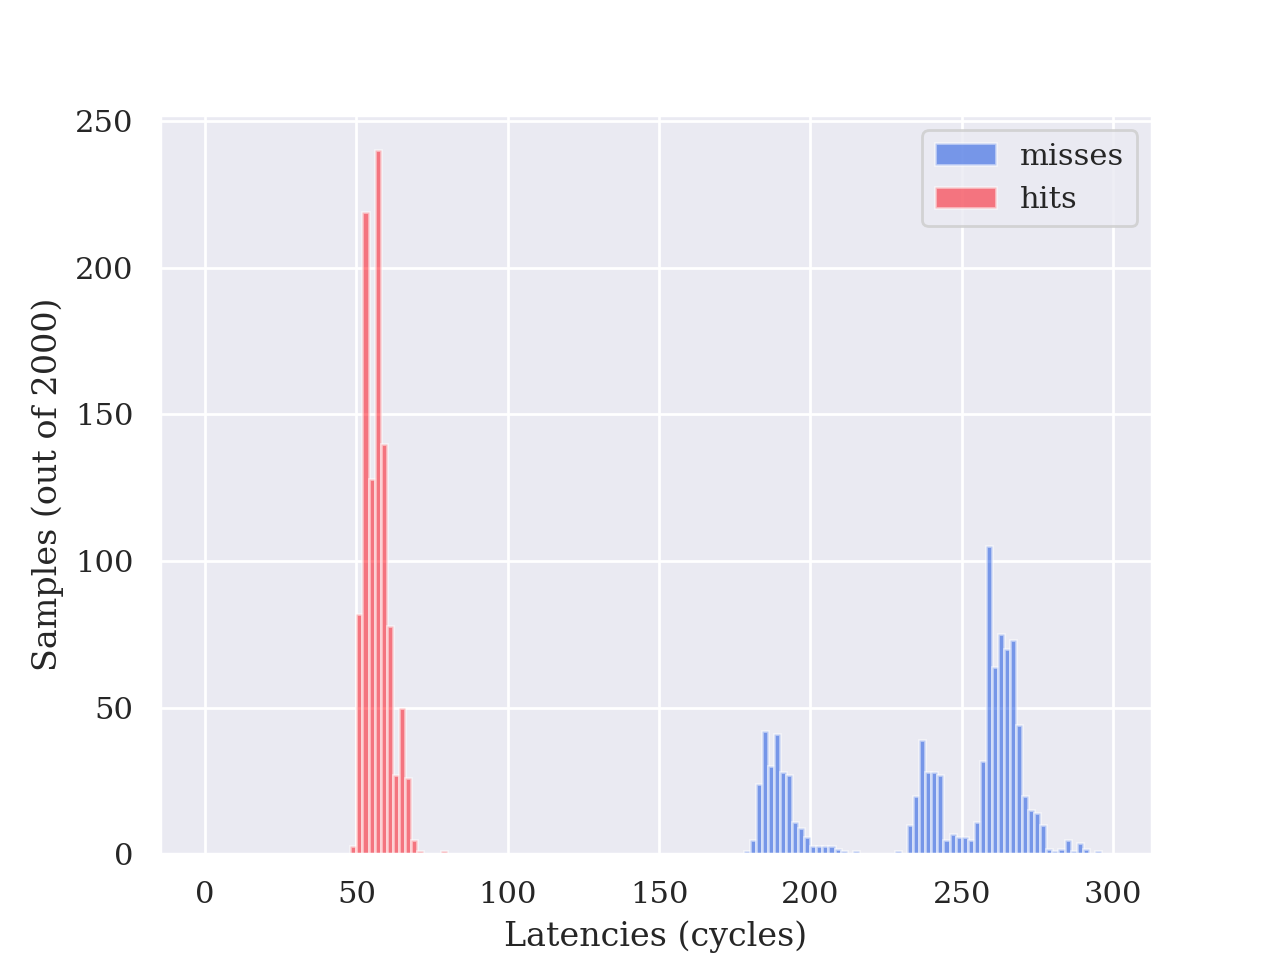

In [54]:
# Load the Pandas libraries with alias 'pd'
import pandas as pd
#Load Seaborn for colors and format.
import seaborn as sns #; sns.set()
#sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib notebook

# Read Misses data file 'measure_rdtscp.txt'
csv_data_1 = pd.read_csv("system_config/results.txt",skiprows=5,skipfooter=3,engine='python',header=None)
# Drop last col and transpose
data1 = csv_data_1.iloc[:, :-1].T
data1.columns = ['misses']

# Read Misses data file 'measure_rdtscp.txt'
csv_data_2 = pd.read_csv("system_config/results.txt",skiprows=2,skipfooter=6,engine='python',header=None)
# Drop last col and transpose
data2 = csv_data_2.iloc[:, :-1].T
data2.columns = ['hits']

data = pd.concat([data1,data2],axis=1)
#print (data)

data['misses'].hist(bins=range(0,300,2),alpha = 0.5, label='misses',color=sns.xkcd_rgb["blue"])
data['hits'].hist(bins=range(0,300,2),alpha = 0.5, label='hits',color=sns.xkcd_rgb["bright red"])


plt.xlabel('Latencies (cycles)')
plt.ylabel('Samples (out of 2000)')
ax = plt.gca()
ax.legend()
plt.show()
plt.savefig('system_config/latency_dist.png')

## NOTE #####
## The Hit and Miss Latencies are same-core LLC-Hits and Misses. 
## During the attack, the cross-core hits that are a slower than same-core hits.
## So LLC-Miss-Threshold-Cycles is chosen as the minimum LLC-Miss latency.
#############

## Base Attack Results (Fig-8)

<IPython.core.display.Javascript object>


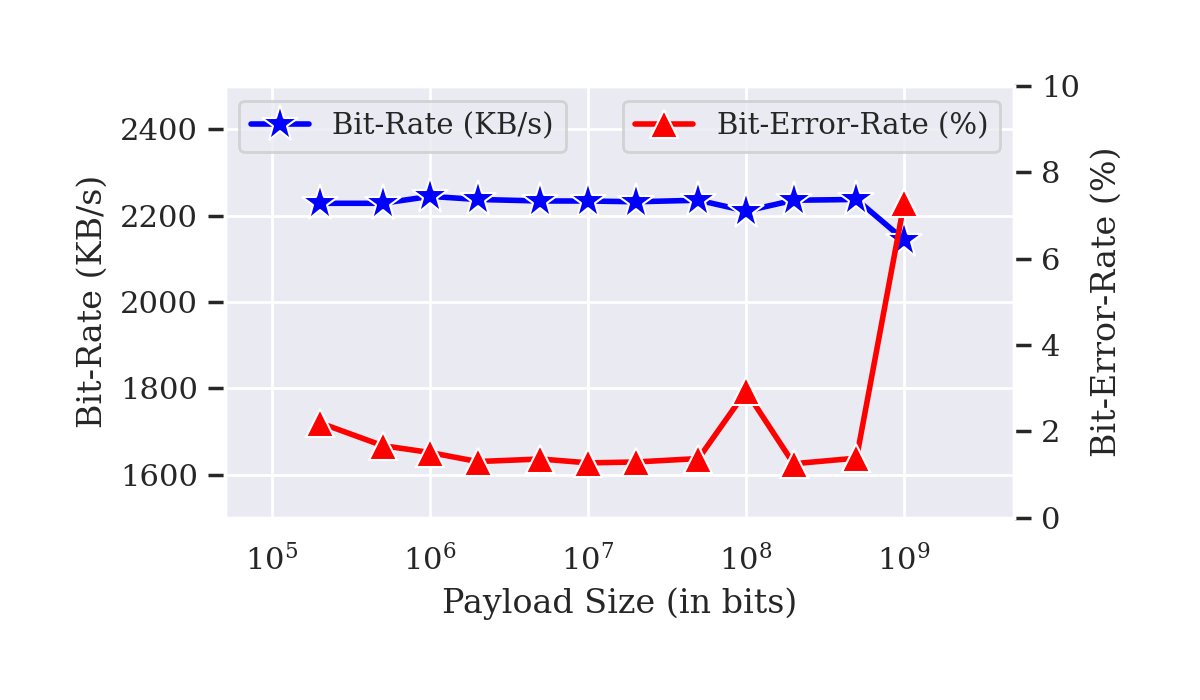

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [53]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib notebook
import pandas as pd

## File name with Data Columns
datafile_str="results/base/bitrate_results.txt"
datafile_col_x="Payload Size (in bits)"
datafile_col_y1="Bits-Per-Second (bps)"
datafile_col_y3="Bit-Rate (KB/s)"
datafile_col_y2="Bit-Error-Rate (%)"
datafile_col_y4="BER 1->0 (%)"
datafile_col_y5="BER 0->1 (%)"
datafile_col_y6="BER 1-bit (%)"
datafile_col_y7="BER multi-bit (%)"
fig_str="results/base/bitrate.eps"

#Read Data File using Pandas
data=pd.read_csv(datafile_str,sep="\s+")
data.columns=[datafile_col_x,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
data[datafile_col_y3] = data[datafile_col_y1].div(8*1024)

#Make percentages to floats:
data[datafile_col_y2] = data[datafile_col_y2].str.rstrip('%').astype('float')
#print (data)


#Plot Data using Seaborn

#--Set line/marker size
sns.set_context("notebook",rc={"lines.linewidth": 2,"lines.markersize": 9})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 25})

#--Plot
sns_plot = sns.lineplot(x=datafile_col_x,y=datafile_col_y3,
                        marker='*',markersize=14,color="blue",label="Bit-Rate (KB/s)",
                        data=data)
ax1 = sns_plot.axes
ax2 = sns_plot.axes.twinx()
sns_plot = sns.lineplot(x=datafile_col_x,y=datafile_col_y2, ax=ax2,
                        marker='^', markersize=10,color="red", label="Bit-Error-Rate (%)",
                        data=data)

#--Add semilog plot
sns_plot.set(xscale="log")
sns_plot.set_xlim(5*10**4,5*10**9)
#--Set range

#--Other axis
ax1.set_ylim([1500,2500])
ax1.legend(loc='upper left',prop={'size': 10.5})

#sns_plot.axes.set_xlim(10)
ax2.grid(False)
ax2.set_ylim(0,10)
ax2.legend(loc='upper right',prop={'size': 10.5})


#--Set ticks location
#sns_plot.axes.xaxis.set_major_locator(ticker.MultipleLocator(10))

#--Show Plot
plt.show()

#--Save Figure
fig = sns_plot.get_figure()
fig.set_size_inches(6,3.5)
plt.tight_layout()
fig.savefig(fig_str,bbox_inches='tight')

## Base Attack Results (Table-2)

In [44]:
import pandas as pd

## File name with Data Columns
datafile_str="results/base/bitrate_results.txt"
datafile_col_x="Payload Size (in bits)"
datafile_col_y1="Bits-Per-Second (bps)"
datafile_col_y3="Bit-Rate (KB/s)"
datafile_col_y2="Bit-Error-Rate (%)"
datafile_col_y4="BER 1->0 (%)"
datafile_col_y5="BER 0->1 (%)"
datafile_col_y6="BER 1-bit (%)"
datafile_col_y7="BER multi-bit (%)"

#Read Data File using Pandas
data=pd.read_csv(datafile_str,sep="\s+")
data.columns=[datafile_col_x,datafile_col_y1,\
              datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
data[datafile_col_y3] = data[datafile_col_y1].div(8*1024)

#Select Rows for Table.
payload_values = [200000,10**6,10**7,10**8,10**9]
data_table=data.loc[data[datafile_col_x].isin(payload_values)]
data_table = data_table[[datafile_col_x,datafile_col_y2,datafile_col_y5,datafile_col_y4]]
print(data_table.T.to_string(header=False))


Payload Size (in bits)  200000  1000000  10000000  100000000  1000000000
Bit-Error-Rate (%)       2.20%    1.51%     1.27%      2.93%       7.28%
BER 0->1 (%)             1.28%    0.33%     0.10%      1.77%       6.17%
BER 1->0 (%)             0.92%    1.18%     1.17%      1.16%       1.11%


## Base Attack with ECC Results (Table-3)

In [4]:
import pandas as pd

## File name with Data Columns
datafile_str="results/base/bitrate_results.txt"
datafileECC_str="results/ecc/bitrate_ECC_results.txt"

datafile_col_x="Payload Size (in bits)"
datafile_col_y1="Bits-Per-Second (bps)"
datafile_col_y3="Bit-Rate (KB/s)"
datafile_col_y2="Bit-Error-Rate (%)"
datafile_col_y4="BER 1->0 (%)"
datafile_col_y5="BER 0->1 (%)"
datafile_col_y6="BER 1-bit (%)"
datafile_col_y7="BER multi-bit (%)"

#Read Data File using Pandas
dataBase=pd.read_csv(datafile_str,sep="\s+")
dataBase.columns=[datafile_col_x,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
dataBase[datafile_col_y3] = dataBase[datafile_col_y1].div(8*1024)

#Read ECC Data File using Pandas
dataECC=pd.read_csv(datafileECC_str,sep="\s+")
dataECC.columns=[datafile_col_x,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
dataECC[datafile_col_y3] = dataECC[datafile_col_y1].div(8*1024)

#Select Results for 10**9 Payload Bits
payload_values = [10**9]
dataBase=dataBase.loc[dataBase[datafile_col_x].isin(payload_values)]
dataECC=dataECC.loc[dataECC[datafile_col_x].isin(payload_values)]

#Create Table
dataBase = dataBase[[datafile_col_y3,datafile_col_y2]]
dataBase.rename(index={11:'No ECC'}, inplace=True)
dataECC = dataECC[[datafile_col_y3,datafile_col_y2]]
dataECC.rename(index={11:'With ECC'}, inplace=True)
frames = [dataBase, dataECC]
data_table = pd.concat(frames)

print(data_table)

          Bit-Rate (KB/s) Bit-Error-Rate (%)
No ECC        2143.564331              7.28%
With ECC      1921.842651              6.48%


## Sensitivity to Varying Shared Array Size (Table-4)

In [48]:
import pandas as pd

## File name with Data Columns
datafile_str="results/base/bitrate_results.txt"
datafileArraySz_str="results/array_sz/bitrate_arraysz_results.txt"

datafile_col_x="Payload Size (in bits)"
datafile_col_y1="Bits-Per-Second (bps)"
datafile_col_y3="Bit-Rate (KB/s)"
datafile_col_y2="Bit-Error-Rate (%)"
datafile_col_y4="BER 1->0 (%)"
datafile_col_y5="BER 0->1 (%)"
datafile_col_y6="BER 1-bit (%)"
datafile_col_y7="BER multi-bit (%)"
datafile_col_y8="ArraySz as multiple of LLC-Size"

#Read Data File using Pandas
dataBase=pd.read_csv(datafile_str,sep="\s+")
dataBase.columns=[datafile_col_x,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
dataBase[datafile_col_y3] = dataBase[datafile_col_y1].div(8*1024)

#Read Data File of ArraySz-Experiments using Pandas
dataArraySz=pd.read_csv(datafileArraySz_str,sep="\s+")
dataArraySz.columns=[datafile_col_x,datafile_col_y8,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
dataArraySz[datafile_col_y3] = dataArraySz[datafile_col_y1].div(8*1024)

#Select Results for 10**8 Payload Bits from Base Results
payload_values = [10**8]
dataBase=dataBase.loc[dataBase[datafile_col_x].isin(payload_values)]
dataBase = dataBase[[datafile_col_y3,datafile_col_y2]]
dataBase[datafile_col_y8]=[8]

#Create Table
dataArraySz = dataArraySz[[datafile_col_y8,datafile_col_y3,datafile_col_y2]]
frames = [dataBase, dataArraySz]
data_table = pd.concat(frames)
data_table = data_table[[datafile_col_y8,datafile_col_y3,datafile_col_y2]]
data_table=data_table.sort_values(by=[datafile_col_y8])
data_table.loc[8,datafile_col_y8]='8 (Default)'
print(data_table.to_string(index=False))

ArraySz as multiple of LLC-Size  Bit-Rate (KB/s) Bit-Error-Rate (%)
                              1      4286.438354             47.72%
                              2      2594.853516             14.14%
                              4      2249.701904              1.83%
                    8 (Default)      2210.332886              2.93%


## Sensitivity to Varying Synchronization Period (Table-5)

In [52]:
import pandas as pd

## File name with Data Columns
datafile_str="results/base/bitrate_results.txt"
datafileSyncPeriod_str="results/sync_period/bitrate_syncperiod_results.txt"

datafile_col_x="Payload Size (in bits)"
datafile_col_y1="Bits-Per-Second (bps)"
datafile_col_y3="Bit-Rate (KB/s)"
datafile_col_y2="Bit-Error-Rate (%)"
datafile_col_y4="BER 1->0 (%)"
datafile_col_y5="BER 0->1 (%)"
datafile_col_y6="BER 1-bit (%)"
datafile_col_y7="BER multi-bit (%)"
datafile_col_y8="Sync-Period (bits)"

#Read Data File using Pandas
dataBase=pd.read_csv(datafile_str,sep="\s+")
dataBase.columns=[datafile_col_x,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
dataBase[datafile_col_y3] = dataBase[datafile_col_y1].div(8*1024)

#Read Data File of ArraySz-Experiments using Pandas
dataSyncPeriod=pd.read_csv(datafileSyncPeriod_str,sep="\s+")
dataSyncPeriod.columns=[datafile_col_x,datafile_col_y8,datafile_col_y1,datafile_col_y2,datafile_col_y4,datafile_col_y5,datafile_col_y6,datafile_col_y7]
dataSyncPeriod[datafile_col_y3] = dataSyncPeriod[datafile_col_y1].div(8*1024)

#Select Results for 10**8 Payload Bits from Base Results
payload_values = [10**8]
dataBase=dataBase.loc[dataBase[datafile_col_x].isin(payload_values)]
dataBase = dataBase[[datafile_col_y3,datafile_col_y2]]
dataBase[datafile_col_y8]=[200000]

#Create Table
dataSyncPeriod = dataSyncPeriod[[datafile_col_y8,datafile_col_y3,datafile_col_y2]]
frames = [dataBase, dataSyncPeriod]
data_table = pd.concat(frames)
data_table = data_table[[datafile_col_y8,datafile_col_y3,datafile_col_y2]]
data_table=data_table.sort_values(by=[datafile_col_y8])
data_table.loc[8,datafile_col_y8]='200000 (Default)'
print(data_table.to_string(index=False))

Sync-Period (bits)  Bit-Rate (KB/s) Bit-Error-Rate (%)
             25000      2111.620117              9.73%
             50000      2237.145142              1.36%
            100000      2141.768433              8.10%
  200000 (Default)      2210.332886              2.93%
            500000      2205.520386              1.26%
